In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [59]:
diabetic7 = pd.read_csv("./dataset_diabetes/diabetic7.csv")

In [60]:
diabetic7 = diabetic7.drop(['admission_type_id'], axis=1)

In [61]:
le = preprocessing.LabelEncoder()

In [62]:
categorical = diabetic7.select_dtypes(include = ["object"]).columns
numerical = diabetic7.select_dtypes(exclude = ["object"]).columns
print("Number of Categorical features: " + str(len(categorical)))
print("Number of Numerical features: " + str(len(numerical)))
diabetic7_categorical = diabetic7[categorical]
diabetic7_numerical = diabetic7[numerical]

Number of Categorical features: 28
Number of Numerical features: 15


In [63]:
categorical= list(categorical)
numerical = list(numerical)

In [64]:
for i in categorical:
    diabetic7[i] = le.fit_transform(diabetic7[i])

In [65]:
answer = diabetic7['target']
diabetic7 = diabetic7.drop(['target'], axis=1)

In [66]:
import pickle

pickle_path = "./xgboost_bestauc_pickle"

with open(pickle_path, 'rb') as handle:
    mod = pickle.load(handle)

In [67]:
predict = pd.DataFrame(mod.predict_proba(diabetic7)[:,1])
predict.columns = ["predict"]
predict.predict = predict.predict *100
predict.predict = predict.predict.astype(int)

In [68]:
df = pd.concat([diabetic7, predict], axis=1)
df = pd.concat([df, answer], axis=1)
df

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,s_diag,t_diag,clustering3,clustering4,clustering2,medical_specialty_new,discharge_id,admission_id,predict,target
0,2,1,5,10,45,1,23,0,0,2,...,16,16,0,1,1,1,8,6,62,0
1,2,1,5,5,39,4,17,0,0,0,...,4,9,2,0,0,3,0,6,45,0
2,2,0,6,3,47,0,13,0,0,5,...,5,11,2,0,0,3,0,6,75,0
3,2,0,7,5,61,0,14,0,0,0,...,11,6,2,0,0,3,5,6,59,0
4,0,1,3,10,76,1,23,0,0,0,...,6,11,0,1,1,5,8,6,48,0
5,2,0,8,13,43,6,39,0,0,0,...,4,4,0,2,0,0,5,0,55,0
6,2,0,7,2,39,1,13,0,0,0,...,4,4,2,0,0,4,0,0,43,0
7,0,1,7,2,51,0,8,0,0,0,...,6,11,0,2,1,5,0,6,42,0
8,4,1,5,4,9,0,13,0,0,0,...,4,4,1,3,1,5,0,6,39,0
9,2,0,6,4,39,2,28,1,0,3,...,4,4,0,2,0,0,0,0,63,1


In [82]:
table = df[df.loc[:, 'predict'] == 91]
table

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,s_diag,t_diag,clustering3,clustering4,clustering2,medical_specialty_new,discharge_id,admission_id,predict,target
23434,2,0,2,3,15,2,11,0,4,15,...,11,4,2,0,0,4,0,1,91,1
57486,2,1,2,2,9,1,13,0,7,12,...,11,5,1,3,1,1,0,6,91,1


In [92]:
for i in range(80,92):
    print(i)
    i = df[df.loc[:, 'predict'] == i]
    print(i)

80
       race  gender  age  time_in_hospital  num_lab_procedures  \
290       2       0    4                 5                  34   
419       0       1    6                 3                  59   
740       2       0    7                 4                  51   
866       2       1    5                 6                  36   
1522      0       0    5                 2                  36   
1688      2       1    6                 5                  64   
2688      2       0    6                 1                  42   
2968      2       0    3                 8                   1   
3318      2       1    8                 2                  29   
3921      0       0    7                 7                  29   
4399      2       1    4                10                  48   
5159      2       0    3                 2                  23   
5417      0       1    7                 1                  26   
6429      2       1    7                 5                  55   
9526   

In [17]:
df['target'][df['predict']>80].value_counts()

1    228
0    149
Name: target, dtype: int64

In [18]:
df['target'][df['predict']==80].value_counts()[0]

75

In [19]:
df['target'][df['predict']==91].value_counts()

1    2
Name: target, dtype: int64

In [31]:
for i in list(range(80,100)):
    print(i)
    print(df['target'][df['predict']==i].value_counts())

80
0    75
1    64
Name: target, dtype: int64
81
1    53
0    51
Name: target, dtype: int64
82
1    39
0    36
Name: target, dtype: int64
83
1    34
0    20
Name: target, dtype: int64
84
1    32
0    21
Name: target, dtype: int64
85
1    22
0     5
Name: target, dtype: int64
86
1    12
0     7
Name: target, dtype: int64
87
1    14
0     3
Name: target, dtype: int64
88
1    13
0     3
Name: target, dtype: int64
89
1    4
0    1
Name: target, dtype: int64
90
1    3
0    2
Name: target, dtype: int64
91
1    2
Name: target, dtype: int64
92
Series([], Name: target, dtype: int64)
93
Series([], Name: target, dtype: int64)
94
Series([], Name: target, dtype: int64)
95
Series([], Name: target, dtype: int64)
96
Series([], Name: target, dtype: int64)
97
Series([], Name: target, dtype: int64)
98
Series([], Name: target, dtype: int64)
99
Series([], Name: target, dtype: int64)


In [95]:
dic = {}
for i in list(range(80,91)):
    print(i)
    print(df['target'][df['predict']==i].value_counts())
    ratio = df['target'][df['predict']==i].value_counts()[1]/ (df['target'][df['predict']==i].value_counts()[0]+df['target'][df['predict']==i].value_counts()[1])
    ratio = ratio *100
    ratio = ratio.astype(int)
    dic.update({i: [df['target'][df['predict']==i].value_counts()[0],  df['target'][df['predict']==i].value_counts()[1], ratio]})
                    

80
0    75
1    64
Name: target, dtype: int64
81
1    53
0    51
Name: target, dtype: int64
82
1    39
0    36
Name: target, dtype: int64
83
1    34
0    20
Name: target, dtype: int64
84
1    32
0    21
Name: target, dtype: int64
85
1    22
0     5
Name: target, dtype: int64
86
1    12
0     7
Name: target, dtype: int64
87
1    14
0     3
Name: target, dtype: int64
88
1    13
0     3
Name: target, dtype: int64
89
1    4
0    1
Name: target, dtype: int64
90
1    3
0    2
Name: target, dtype: int64


In [106]:
print(df['target'][df['predict']==91].value_counts())

1    2
Name: target, dtype: int64


In [97]:
dic[91] = [0,2, 100]

In [98]:
dic

{80: [75, 64, 46],
 81: [51, 53, 50],
 82: [36, 39, 52],
 83: [20, 34, 62],
 84: [21, 32, 60],
 85: [5, 22, 81],
 86: [7, 12, 63],
 87: [3, 14, 82],
 88: [3, 13, 81],
 89: [1, 4, 80],
 90: [2, 3, 60],
 91: [0, 2, 100]}

In [103]:
quantile = pd.DataFrame.from_dict(dic, orient = "index", columns = ["0","1","predict_ratio"])
quantile.to_csv('quantile.csv',index=False)

Text(0, 0.5, 'Feature Importance Score')

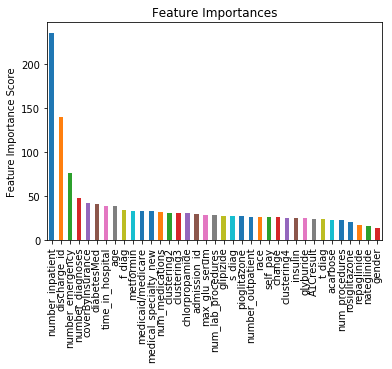

In [77]:
feat_imp = pd.Series(mod.get_booster().get_score(importance_type='gain')).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [79]:
feat_imp[0:15]

number_inpatient         235.580923
discharge_id             139.364397
number_emergency          76.004737
number_diagnoses          47.683275
coverByInsurance          41.463558
diabetesMed               40.585404
time_in_hospital          39.141402
age                       38.031497
f_diag                    33.867758
metformin                 33.375099
medicaid/medicare         33.357700
medical_specialty_new     32.964152
num_medications           31.274811
clustering2               31.046444
clustering3               30.223512
dtype: float64